# Exploratory Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import os
import random
from tqdm import tqdm
import cv2 as cv
import PIL
from PIL import Image
!pip install plotly
import plotly.express as px
from IPython import display

import tensorflow as tf
from tensorflow import keras

import torch
from torchvision import datasets
from torchvision import transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_dir = './drive/MyDrive/NFTProject/kaggle/input/cryptopunks/'
os.listdir(base_dir)

['txn_history-2021-10-07.jsonl', 'imgs']

In [ ]:
data_dir = './drive/MyDrive/NFTProject/kaggle/input/cryptopunks/txn_history-2021-10-07.jsonl'
image_dir = "./drive/MyDrive/NFTProject/kaggle/input/cryptopunks/imgs"
image_root = "./drive/MyDrive/NFTProject/kaggle/input/cryptopunks/imgs/imgs"

In [ ]:
df = pd.read_json(base_dir+'txn_history-2021-10-07.jsonl', lines=True)
df.head()

,txn_type,from,to,date,timestamp,source,eth,punk_id,from_wallet_address,to_wallet_address,type,accessories
0,Bid Withdrawn,0xe73a1d,,2021-09-04,2021-09-04,larvalabs,321.0,0,None,None,[Female],"[Green Eye Shadow, Earring, Blonde Bob]"
1,Bid,0xe73a1d,,2021-09-01,2021-09-01,larvalabs,321.0,0,None,None,[Female],"[Green Eye Shadow, Earring, Blonde Bob]"
2,Bid Withdrawn,0x2e5e22,,2021-09-01,2021-09-01,larvalabs,320.0,0,None,None,[Female],"[Green Eye Shadow, Earring, Blonde Bob]"
3,Bid,0x2e5e22,,2021-09-01,2021-09-01,larvalabs,320.0,0,None,None,[Female],"[Green Eye Shadow, Earring, Blonde Bob]"
4,Bid Withdrawn,0x2e5e22,,2021-09-01,2021-09-01,larvalabs,263.0,0,None,None,[Female],"[Green Eye Shadow, Earring, Blonde Bob]"


Sample 100 CryptoPunks


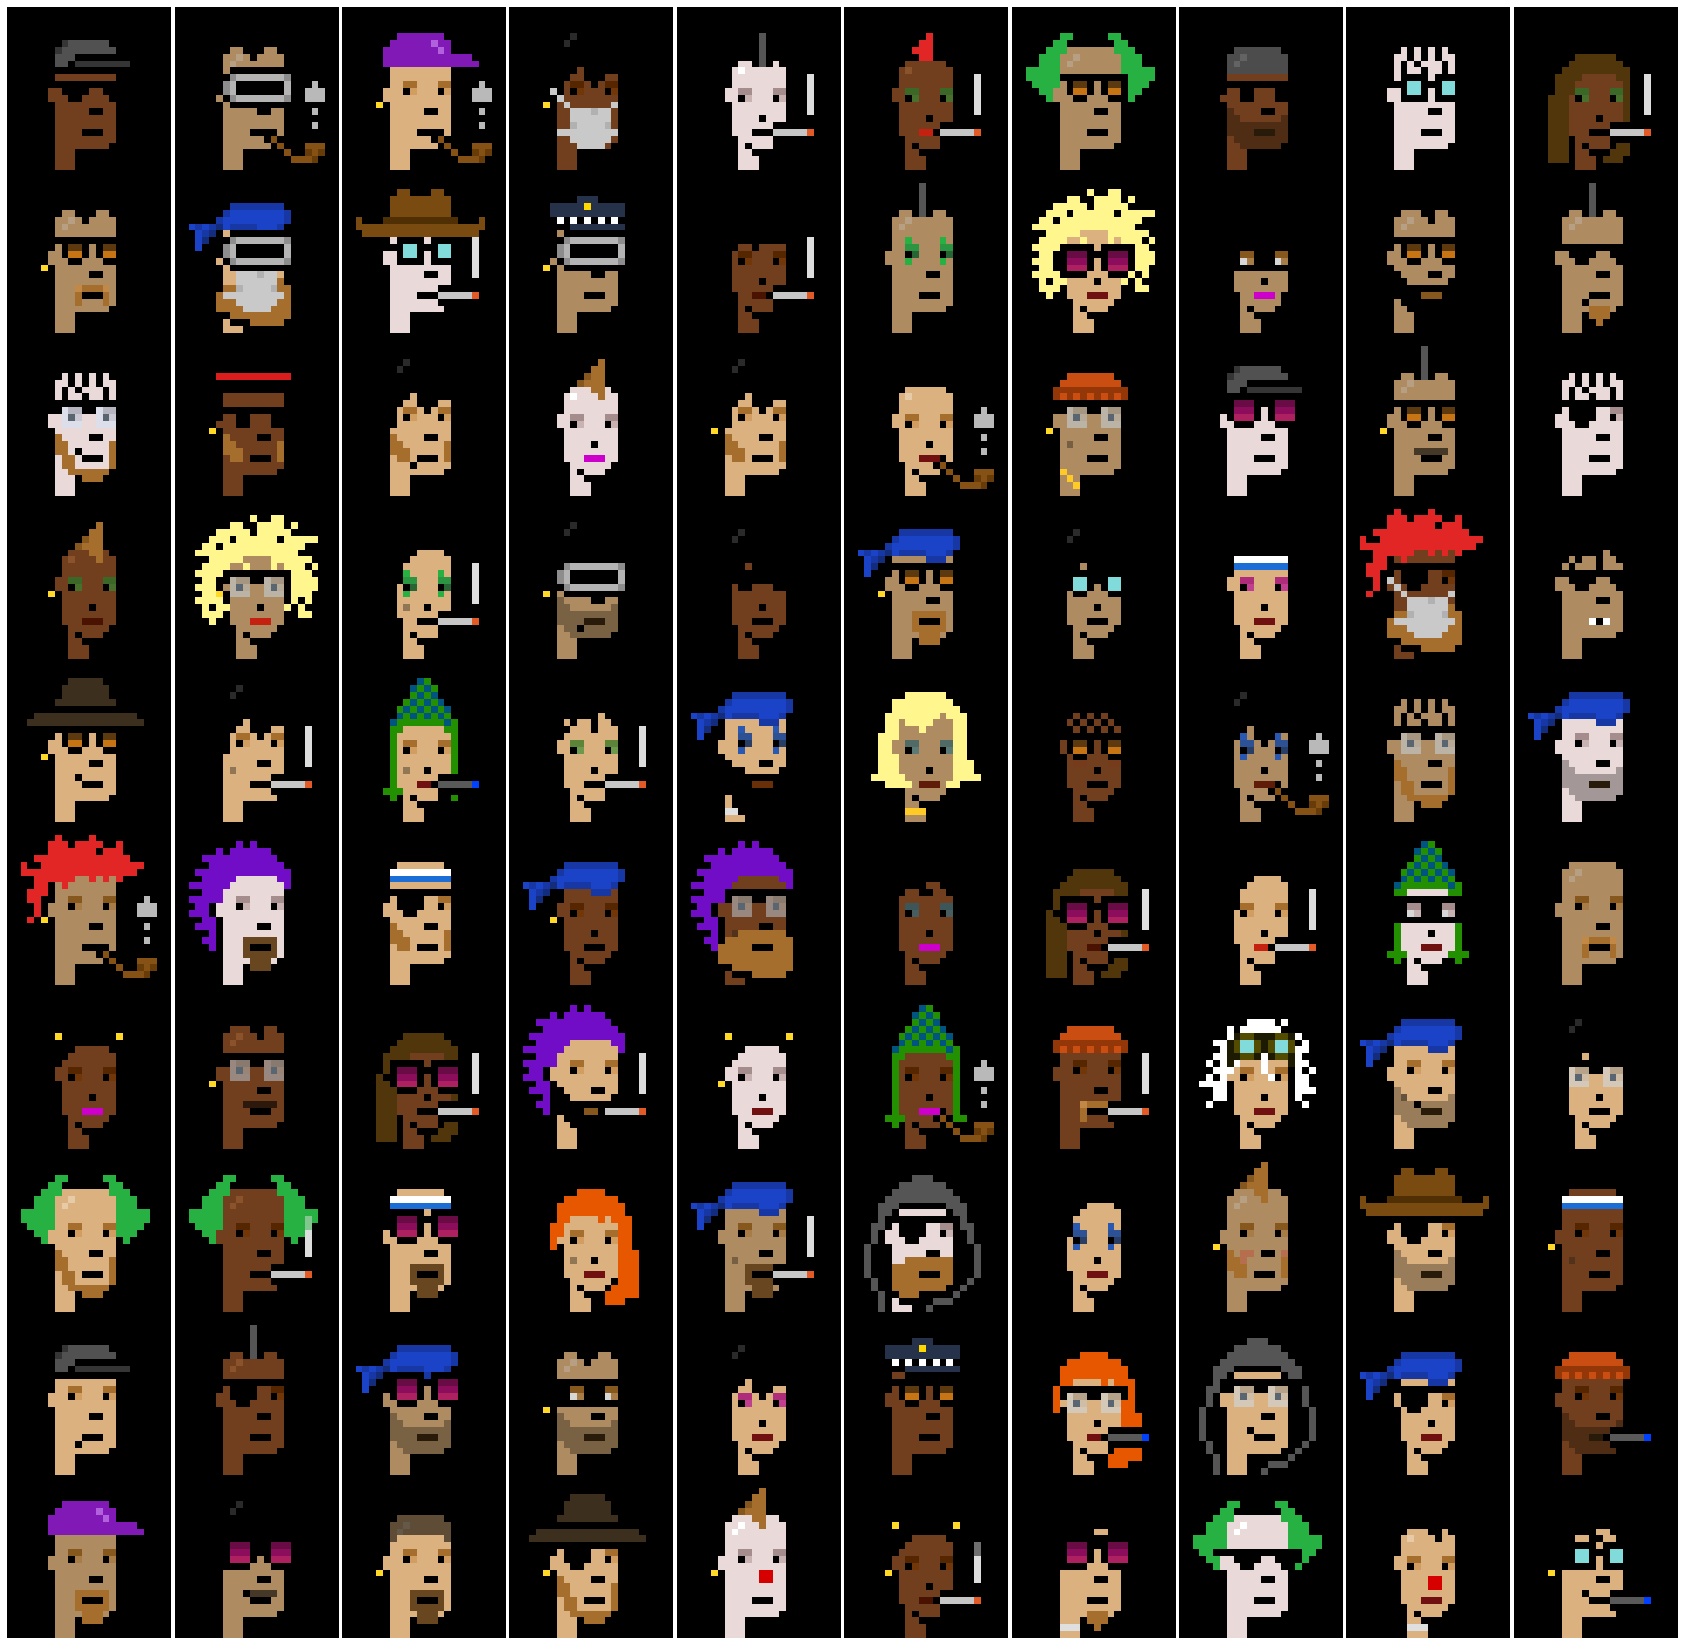

In [ ]:
#look at 100 samples

#define number of rows and cols
no_plots = 10*10

#define path
images = glob.glob("./drive/MyDrive/NFTProject/kaggle/input/cryptopunks/imgs/imgs/*.png")

plt.rcParams['figure.figsize'] = (30, 30)
plt.subplots_adjust(wspace=0, hspace=0)

print("Sample 100 CryptoPunks")
for idx,image in enumerate(images[:no_plots]):
    sample_img = cv.imread(image)
    plt.subplot(10, 10, idx+1)
    plt.axis('off')
    plt.imshow(cv.cvtColor(sample_img,cv.COLOR_BGR2RGB)) #covert color space
plt.show()

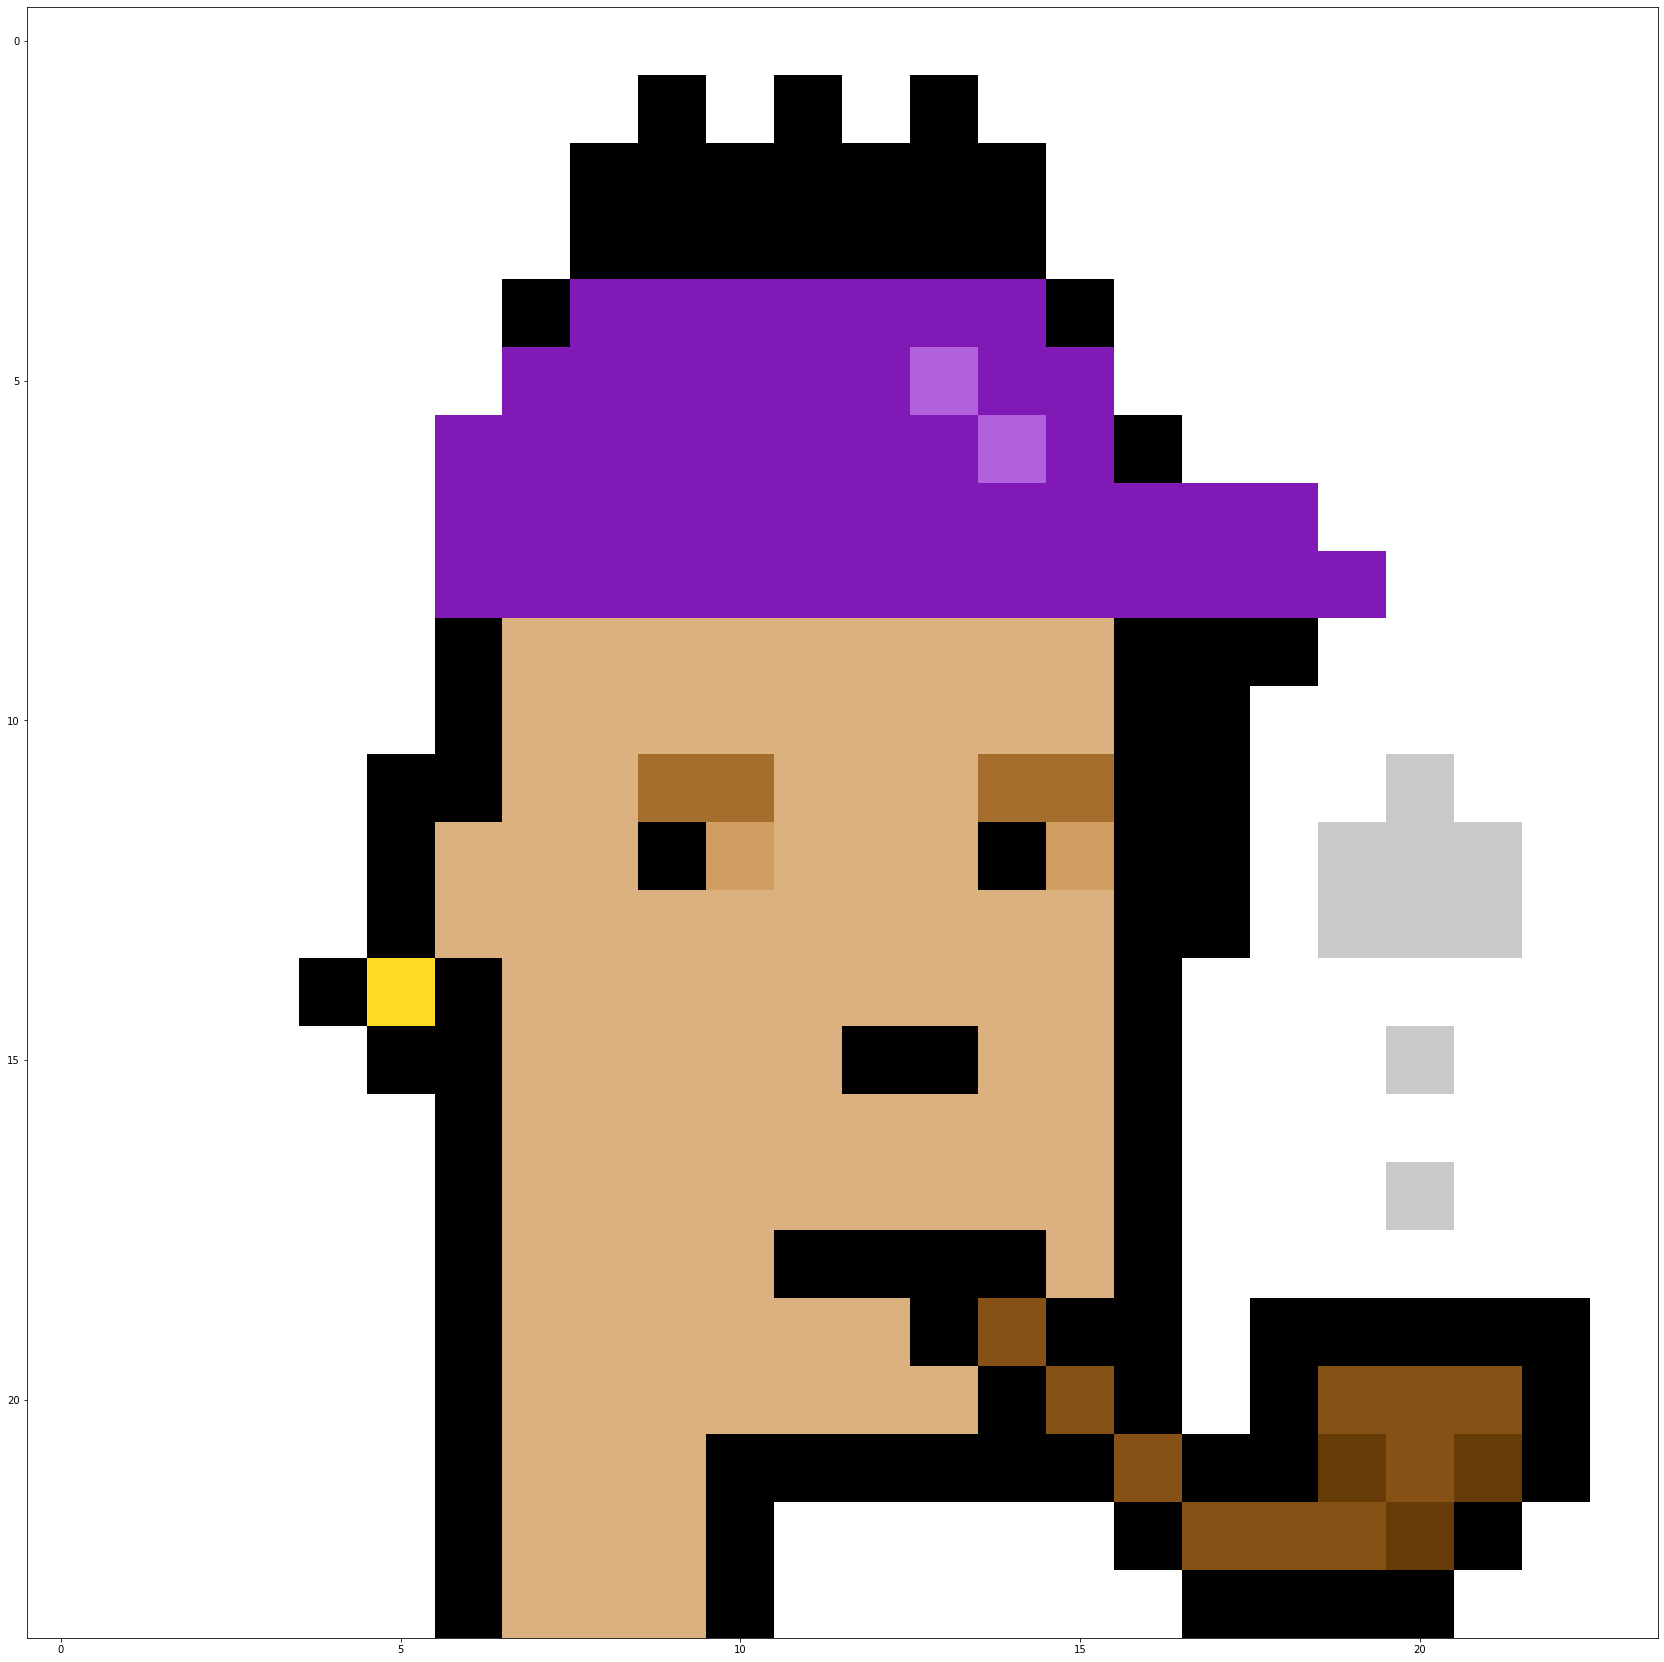

In [ ]:
punks = [img for img in glob.glob("./drive/MyDrive/NFTProject/kaggle/input/cryptopunks/imgs/imgs/*.png")]

for punk in punks[0:3]:
    img = plt.imread(punk)
    plt.imshow(img)
plt.show()

In [ ]:
#check data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167492 entries, 0 to 167491
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   txn_type             167492 non-null  object        
 1   from                 167492 non-null  object        
 2   to                   167492 non-null  object        
 3   date                 167492 non-null  datetime64[ns]
 4   timestamp            167492 non-null  datetime64[ns]
 5   source               167492 non-null  object        
 6   eth                  127542 non-null  float64       
 7   punk_id              167492 non-null  int64         
 8   from_wallet_address  419 non-null     object        
 9   to_wallet_address    419 non-null     object        
 10  type                 167492 non-null  object        
 11  accessories          167492 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(8)
memory usage: 15.3

In [ ]:
#create new dataframe with only useful columns
df = df[["txn_type", "date", "eth", "punk_id", "type", "accessories"]]
df.head()

,txn_type,date,eth,punk_id,type,accessories
0,Bid Withdrawn,2021-09-04,321.0,0,[Female],"[Green Eye Shadow, Earring, Blonde Bob]"
1,Bid,2021-09-01,321.0,0,[Female],"[Green Eye Shadow, Earring, Blonde Bob]"
2,Bid Withdrawn,2021-09-01,320.0,0,[Female],"[Green Eye Shadow, Earring, Blonde Bob]"
3,Bid,2021-09-01,320.0,0,[Female],"[Green Eye Shadow, Earring, Blonde Bob]"
4,Bid Withdrawn,2021-09-01,263.0,0,[Female],"[Green Eye Shadow, Earring, Blonde Bob]"


In [ ]:
#value counts
df['txn_type'].unique()

array(['Bid Withdrawn', 'Bid', 'Sold', 'Offered', 'Transfer', 'Claimed',
       'Offer Withdrawn', '(Wrap)', '(Unwrap)'], dtype=object)

In [ ]:
df['accessories'].explode().unique()

array(['Green Eye Shadow', 'Earring', 'Blonde Bob', 'Smile', 'Mohawk',
       'Wild Hair', 'Nerd Glasses', 'Pipe', 'Big Shades', 'Goat',
       'Purple Eye Shadow', 'Half Shaved', 'Do-rag', 'Wild White Hair',
       'Spots', 'Clown Eyes Blue', 'Messy Hair', 'Luxurious Beard',
       'Clown Nose', 'Police Cap', 'Big Beard', 'Blue Eye Shadow',
       'Black Lipstick', 'Clown Eyes Green', 'Straight Hair Dark',
       'Blonde Short', 'Purple Lipstick', 'Straight Hair Blonde',
       'Pilot Helmet', 'Hot Lipstick', 'Regular Shades', 'Stringy Hair',
       'Small Shades', 'Frown', 'Eye Mask', 'Muttonchops', 'Bandana',
       'Horned Rim Glasses', 'Crazy Hair', 'Classic Shades', 'Handlebars',
       'Mohawk Dark', 'Dark Hair', 'Peak Spike', 'Normal Beard Black',
       'Cap', 'VR', 'Frumpy Hair', 'Cigarette', 'Normal Beard',
       'Red Mohawk', 'Shaved Head', 'Chinstrap', 'Mole', 'Knitted Cap',
       'Fedora', 'Shadow Beard', 'Straight Hair', 'Hoodie', 'Eye Patch',
       'Headband', 'Cowbo

In [ ]:
len(df['accessories'].explode().unique())

88

In [ ]:
#exploded 'type' list to rows of the subset columns
df = df.explode("type")
df.head()

,txn_type,date,eth,punk_id,type,accessories
0,Bid Withdrawn,2021-09-04,321.0,0,Female,"[Green Eye Shadow, Earring, Blonde Bob]"
1,Bid,2021-09-01,321.0,0,Female,"[Green Eye Shadow, Earring, Blonde Bob]"
2,Bid Withdrawn,2021-09-01,320.0,0,Female,"[Green Eye Shadow, Earring, Blonde Bob]"
3,Bid,2021-09-01,320.0,0,Female,"[Green Eye Shadow, Earring, Blonde Bob]"
4,Bid Withdrawn,2021-09-01,263.0,0,Female,"[Green Eye Shadow, Earring, Blonde Bob]"


In [ ]:
#visualize
fig = px.bar(df[df.txn_type == 'Sold'].groupby("type").agg({"eth": "max"}).sort_values(by="eth").reset_index('type'),
             x="type", 
             y="eth", 
             color="type", 
             title="CryptoPunk Types vs. Price")
fig.show()

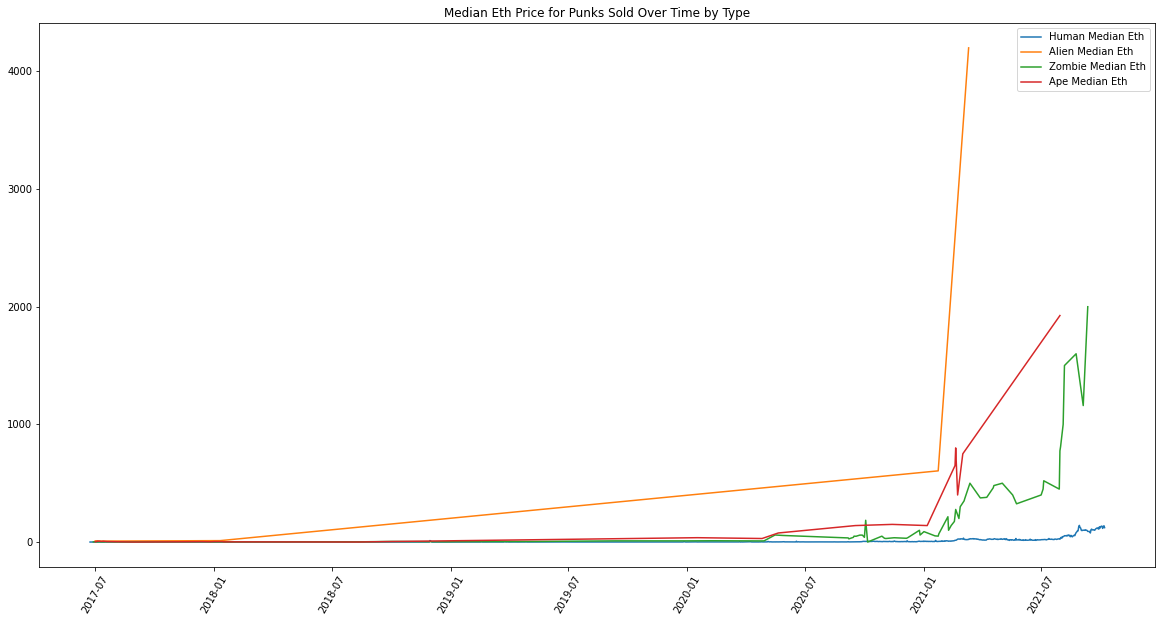

In [ ]:
#visualize human
human = df[(df.txn_type == 'Sold') & ((df.type == "Female") | (df.type == "Male")) ].groupby("date").agg({"eth": ["median"]}).reset_index("date")

#visualize alien
alien = df[(df.txn_type == 'Sold') & ((df.type == "Alien")) ].groupby("date").agg({"eth": ["median"]}).reset_index("date")

#visualize zombie
zombie = df[(df.txn_type == 'Sold') & ((df.type == "Zombie")) ].groupby("date").agg({"eth": ["median"]}).reset_index("date")

#visualize ape
ape = df[(df.txn_type == 'Sold') & ((df.type == "Ape")) ].groupby("date").agg({"eth": ["median"]}).reset_index("date")

plt.figure(figsize=(20,10))
plt.plot(human['date'], 
         human['eth']['median'], 
         label="Human Median Eth")

plt.plot(alien['date'], 
         alien['eth']['median'], 
         label="Alien Median Eth")

plt.plot(zombie['date'], 
         zombie['eth']['median'], 
         label="Zombie Median Eth")

plt.plot(ape['date'], 
         ape['eth']['median'], 
         label="Ape Median Eth")

plt.legend()
plt.xticks(rotation=60)
plt.title("Median Eth Price for Punks Sold Over Time by Type")
plt.show()

In [ ]:
#get number of attributes
df['num_attributes'] = df.accessories.apply(lambda x: len(x))

In [ ]:
#compare number of attributes vs. price
fig = px.bar(df[(df.txn_type == "Sold") & ((df.type == "Female") | (df.type == "Male"))].groupby("num_attributes").agg({"eth": "mean"}).reset_index("num_attributes"),
             x="num_attributes", 
             y="eth", 
             color="eth", 
             title="CryptoPunk Price per Number of Attributes of Human Punks")
fig.show()

In [ ]:
#visualize number of attributes vs price for alien
fig = px.bar(df[(df.txn_type == "Sold") & ((df.type == "Alien"))].groupby("num_attributes").agg({"eth": "mean"}).reset_index("num_attributes"),
             x="num_attributes", 
             y="eth", 
             color="eth", 
             title="CryptoPunk Price per Number of Attributes of Alien Punks")
fig.show()

In [ ]:
#visualize number of attributes vs price for zombie
fig = px.bar(df[(df.txn_type == "Sold") & ((df.type == "Zombie"))].groupby("num_attributes").agg({"eth": "mean"}).reset_index("num_attributes"),
             x="num_attributes", 
             y="eth", 
             color="eth", 
             title="CryptoPunk Price per Number of Attributes of Zombie Punks")
fig.show()

In [ ]:
#visualize number of attributes vs price for ape
fig = px.bar(df[(df.txn_type == "Sold") & ((df.type == "Ape"))].groupby("num_attributes").agg({"eth": "mean"}).reset_index("num_attributes"),
             x="num_attributes", 
             y="eth", 
             color="eth", 
             title="CryptoPunk Price per Number of Attributes of Ape Punks")
fig.show()

# DC-GAN Intuition

* generator generates data for discriminator training using latent embedding (usually random noise)
* discriminator distinguishes the generator's generated data from real data and penalizes the generator for fake data.
* The two networks are set out to compete with each other i.e. "adversarial". Overtime, the generator gets better at generating images that are super close to real images and discriminator gets better at differentiating them.

The generator network takes random Gaussian noise and maps it into input images such that the discriminator cannot tell which images came from the dataset and which images came from the generator. The discriminator will be trained to learn to tell the difference between images comes from the dataset and images comes from the generator.

GANs typically work with image data and use Convolutional Neural Networks, (CNNs). A CNN architecture is composed of convolutional layer with ReLU, pooling layer, and lastly fully connected Dense layers.

# DataLoader & Preprocessing

In [ ]:
#display tensor image
def tensor_imshow(img, dnorm=True):
    img = img.to('cpu')
    npimg = img.detach().numpy()
    if dnorm:
        npimg = npimg*0.5+0.5
    plt.figure(figsize=(3, 3))
    plt.axis('off')
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [ ]:
def get_dataloader(batch_size,           #batch size during training
                   image_size,           #spatial size of training images
                   data_dir=image_root,   #root directory for dataset
                   num_workers=1):       #number of sub-processes
    
    stats = (0.5, 0.5, 0.5), (0.5, 0.5, 0.5) 
    
    #create transformer to transform images
    transform = transforms.Compose([transforms.Resize((image_size, image_size)),  #resize
                                    transforms.ToTensor(),                        #convert to tensor
                                    transforms.Normalize(*stats)])                #normalize to be between -1 and 1
    
    # create the dataset
    dataset = datasets.ImageFolder(root=image_dir,
                                   transform=transform)
    
    #create the dataloader
    data_loader = torch.utils.data.DataLoader(dataset,
                                              batch_size=batch_size,
                                              shuffle=True,
                                              num_workers=num_workers,
                                              pin_memory=True)
    
    return data_loader

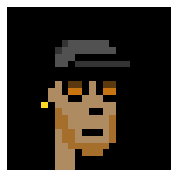

In [ ]:
#test dataloader
batch_size, image_size = 5, 24

train_loader = get_dataloader(batch_size,                              image_size)

dataiter = iter(train_loader) #dataloader is an iterator

img,_ = next(dataiter)
sample_img = img[0]

#display tensor image
tensor_imshow(sample_img)

# Build Generator

During generator training:

* The generator takes in a random input and output a single 64x64 colored image.
* The image is upsampled: doubling in size and quadrupling in the area of activations each time it passes through the ConvTranspose2d layer.

As the result, the generator learns how to map the low dimensional image to the high dimensional image more and more effectively to fool the discriminator.

In [ ]:
class Generator(nn.Module):       #signals neural network
    def __init__(self, 
                 z_dim=100,      #noise vector
                 im_chan=3,      #color chanel, 3 for red green blue
                 hidden_dim=64): #spatial size of feature map (conv)
        
        super(Generator, self).__init__()
        self.z_dim = z_dim
        self.im_chan = im_chan
        self.hidden_dim = hidden_dim
        
        self.generator_cnn = nn.Sequential(self.make_gen_block(z_dim, hidden_dim*8, stride=1, padding=0),   
                                           #(64*8) x 4 x 4
                                           self.make_gen_block(hidden_dim*8, hidden_dim*4),                           
                                           #(64*4) x 8 x 8
                                           self.make_gen_block(hidden_dim*4, hidden_dim*2),                           
                                           #(64*2) x 16 x 16
                                           self.make_gen_block(hidden_dim*2, hidden_dim),                             
                                           #(64) x 32 x 32
                                           self.make_gen_block(hidden_dim, im_chan, final_layer=True))
    
    def make_gen_block(self, 
                       im_chan,     #image dimension
                       op_chan,     #output dimension
                       kernel_size=4, 
                       stride=2, 
                       padding=1, 
                       final_layer=False): 
        
        layers = []
        #de-convolutional layer
        layers.append(nn.ConvTranspose2d(im_chan,     
                                         op_chan, 
                                         kernel_size, 
                                         stride, 
                                         padding, 
                                         bias=False))
        
        if not final_layer:
            layers.append(nn.BatchNorm2d(op_chan))
            layers.append(nn.LeakyReLU(0.2))
        else:
            layers.append(nn.Tanh())
        
        return nn.Sequential(*layers)
    
    def forward(self,noise):
        x = noise.view(-1,self.z_dim,1,1)
        return self.generator_cnn(x)

    def get_noise(n_samples, 
                  z_dim, 
                  device='cpu'):
        return torch.randn(n_samples, 
                           z_dim, 
                           device=device)

In [ ]:
#test Generator
noise = Generator.get_noise(n_samples=5,
                            z_dim=100)

g = Generator(z_dim=100,
              im_chan=3,
              hidden_dim=64)

In [ ]:
print(g)

Generator(
  (generator_cnn): Sequential(
    (0): Sequential(
      (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
      (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.2)
    )
    (1): Sequential(
      (0): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.2)
    )
    (2): Sequential(
      (0): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.2)
    )
    (3): Sequential(
      (0): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_run

# Build Discriminator

The discriminator's training data comes from two sources:

* real data: The discriminator uses these instances as positive examples during training. This is classified as 0.
* fake data created by the generator: The discriminator uses these instances as negative examples during training. This is classified as 1.

During discriminator training:

* The discriminator takes in one input image and outputs a binary prediction to classify when the image is real or fake.
* The discriminator_loss penalizes itself if it misclassifies the image. The total loss is the sum of the losses for real and fake images, discriminator_loss = real_loss + fake_loss.
* The discriminator updates its weights through back-propagation from the discriminator loss through the discriminator network.

In [ ]:
class Discriminator(nn.Module):
    def __init__(self, 
                 im_chan=3,       #image channels, 3 for red green blue
                 conv_dim=64,     #spatial dimension of feature map
                 image_size=64):  #spatial size of training images
        
        super(Discriminator, self).__init__()
        self.image_size = image_size
        self.conv_dim = conv_dim
        
        self.disc_cnn = nn.Sequential(self.make_disc_block(im_chan, conv_dim),
                                      self.make_disc_block(conv_dim, conv_dim*2),
                                      self.make_disc_block(conv_dim*2, conv_dim*4),
                                      self.make_disc_block(conv_dim*4, conv_dim*8),
                                      #no need a sigmoid here since it is included in the loss function
                                      self.make_disc_block(conv_dim*8, 1, padding=0, final_layer=True)) 
        
        
    def make_disc_block(self,
                        im_chan,
                        op_chan,
                        kernel_size=4,
                        stride=2,
                        padding=1,
                        final_layer=False):
        layers = []
        layers.append(nn.Conv2d(im_chan,
                                op_chan,
                                kernel_size,
                                stride,
                                padding,
                                bias=False))
        
        if not final_layer:
            layers.append(nn.BatchNorm2d(op_chan))
            layers.append(nn.LeakyReLU(0.2, inplace=True))
        
        return nn.Sequential(*layers)
    
    #given an image tensor, returns a 1-dimension tensor representing fake/real
    def forward(self,image):
        pred = self.disc_cnn(image)
        pred = pred.view(image.size(0),-1)
        return pred
    
    def _get_final_feature_dimention(self):
        final_width_height = (self.image_size //  2**len(self.disc_cnn))**2
        final_depth = self.conv_dim * 2**(len(self.disc_cnn)-1)
        return final_depth*final_width_height

In [ ]:
#test Discriminator
d = Discriminator(im_chan=3,
                  conv_dim=64,
                  image_size=64)

In [ ]:
print(d)

Discriminator(
  (disc_cnn): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.2, inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.2, inplace=True)
    )
    (2): Sequential(
      (0): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.2, inplace=True)
    )
    (3): Sequential(
      (0): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affi

# Define Training Parameters

## Weight Initialization

All model weights will be randomly initialized from a normal distribution with mean=0, stdev=0.2 according to Goodfellow (2014).

* weights_init_normal: takes an initialized model as input and reinitializes all convolutional, convolutional-transpose, and batch normalization layers to meet this criteria. This function is applied to the models immediately after initialization.

In [ ]:
#custom weights initialization to randomly initialize all weights
#mean=0, stdev=0.2
def weights_init_normal(m):
    
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.ConvTranspose2d):
        torch.nn.init.normal_(m.weight, 0.0, 0.02) 
        
    if isinstance(m, nn.BatchNorm2d):
        torch.nn.init.normal_(m.weight, 0.0, 0.02)
        torch.nn.init.constant_(m.bias, 0)

## Loss Functions

Now we create loss functions to calculate the discriminator's loss and the generator's loss. This is how the discriminator and generator will know how they are doing and improve themselves.

In [ ]:
def real_loss(D_out,device='cpu'):
    
    #initialize BCELoss function
    criterion = nn.BCEWithLogitsLoss()
    
    #batch size
    batch_size = D_out.size(0)
    
    #labels will be used when calculating the losses
    #real labels = 1 and lable smoothing => 0.9
    labels = torch.ones(batch_size, device=device)*0.9 
    
    loss = criterion(D_out.squeeze(), labels)
    return loss

In [ ]:
def fake_loss(D_out, device='cpu'):
    
    #initialize BCELoss function
    criterion = nn.BCEWithLogitsLoss()
    
    #batch size
    batch_size = D_out.size(0)
    
    #labels will be used when calculating the losses
    #fake labels = 0
    labels = torch.zeros(batch_size,
                         device=device) 
    
    loss = criterion(D_out.squeeze(), labels)
    return loss

# Training Procedure

**Part 1 - Train the discriminator**

* Generate fixed_z to get a fixed batch of latent vectors which we will use to keep track of the generator learning progression.
* Train the discriminator with all-real batches of images: forward pass, calculate d_real_loss with real_loss() and calculate the gradients in a backward pass gradients in a backward pass with backward().
* Use the generator to generate all-fake batches of images and use that to train the discriminator: forward pass, calculate d_fake_loss with fake_loss() and and calculate the gradients in a backward pass with backward()
* Total d_loss with be the sum of d_real_loss and d_fake_loss.
* Update d_optimizer with step().

**Part 2 - Train the generator**

* Use discriminator to classify generator's output g_out.
* Computes generator's loss using real_loss().
* Computes generator's gradients in a backward pass with backward().
* Updates generator's optimizer with step().

For every mini-batch of data, we train the discriminator for one iteration, and then the generator for one iteration.

In [ ]:
def print_tensor_images(images_tensor):
    
    '''
    Function for visualizing images: Given a tensor of images, prints the images.
    '''
        
    plt.rcParams['figure.figsize'] = (15, 15)
    plt.subplots_adjust(wspace=0, hspace=0)
    
    images_tensor = images_tensor.to('cpu')
    npimgs = images_tensor.detach().numpy()
    
    no_plots = len(images_tensor)

    for idx,image in enumerate(npimgs):
        plt.subplot(1, 8, idx+1)
        plt.axis('off')
        #dnorm
        image = image * 0.5 + 0.5
        plt.imshow(np.transpose(image, (1, 2, 0)))
        
    plt.show()

In [ ]:
def train(D, G, 
          n_epochs,
          dataloader,
          d_optimizer,
          g_optimizer,
          z_dim,
          print_every=50,
          device='cpu'):
    
    #to keep track of the generator’s learning progression, 
    #we will generate a fixed batch of latent vectors that are drawn from a Gaussian distribution   
    sample_size=8
    fixed_z = Generator.get_noise(n_samples=sample_size,
                                  z_dim=z_dim,
                                  device=device)
    
    for epoch in range(1,n_epochs+1):
        #use dataloader to fetch batches
        for batch_i,(real_images,_) in enumerate(dataloader):
            batch_size = real_images.size(0)
            real_images = real_images.to(device)
            
            #Part 1: Train the Discriminator ========================================================
            #goal: to maximize the probability of correctly classifying a given input as real or fake
            
            #zero out the gradients before backpropagation
            d_optimizer.zero_grad()
            
            ##classify all-real batch
            d_real_op = D(real_images) #average output (across the batch) of the discriminator
            d_real_loss = real_loss(d_real_op,
                                    device=device)
            
            #train with all-fake batch
            noise = Generator.get_noise(n_samples=batch_size,
                                        z_dim=z_dim,
                                        device=device)
            fake_images = G(noise)
            
            #classify all-fake batch
            d_fake_op = D(fake_images) #average output (across the batch) of the generator
            d_fake_loss = fake_loss(d_fake_op,
                                    device=device)
            
            #total loss
            d_loss = d_real_loss + d_fake_loss
            
            #update gradients
            d_loss.backward()
            #update optimizer
            d_optimizer.step()
            
            #Part 2: Train the Generator ==============================================================
            #zero out the gradients before backpropagation
            g_optimizer.zero_grad()
            noise = Generator.get_noise(n_samples=batch_size,
                                        z_dim=z_dim,
                                        device=device)
            
            #use discriminator to classify generator's output
            g_out = G(noise)
            d_out = D(g_out)
            
            g_loss = real_loss(d_out, 
                               device=device) 
            #update gradients
            g_loss.backward()
            #update optimizer
            g_optimizer.step()
        
        print('Epoch [{:5d}/{:5d}] | d_loss: {:6.4f} | g_loss: {:6.4f}'.format(epoch, 
                                                                               n_epochs, 
                                                                               d_loss.item(),  #keep track of loss
                                                                               g_loss.item())) #keep track of loss
        if (epoch % print_every == 0):
            G.eval()
            sample_image = G(fixed_z)
            print_tensor_images(sample_image)
            G.train()

## Train Time!

In [ ]:
#hyperparameters
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Device is ", device)

#incorrect hyperparameter settings lead to mode collapse
#we will follow Goodfellow’s paper
z_dim = 100       #noise
beta_1 = 0.5      #as specified in the original DCGAN paper
beta_2 = 0.999 
lr = 0.0002       #as specified in the original DCGAN paper
n_epochs = 100
batch_size = 128
image_size = 64

Device is  cuda


In [ ]:
#initialize generator
generator = Generator(z_dim, 
                      im_chan=3, 
                      hidden_dim=64).to(device)

#initialize discriminator
discriminator = Discriminator(im_chan=3, 
                              conv_dim=64, 
                              image_size=image_size).to(device)

#setup Adam optimizers for generator
g_optimizer = optim.Adam(generator.parameters(), 
                         lr=lr, 
                         betas=(beta_1, beta_2))

#setup Adam optimizers for discriminator
d_optimizer = optim.Adam(discriminator.parameters(), 
                         lr=lr, 
                         betas=(beta_1, beta_2))

#setup dataloader
dataloader = get_dataloader(batch_size, 
                            image_size, 
                            image_root)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs
Epoch [    1/   50] | d_loss: 0.4688 | g_loss: 2.9819
Epoch [    2/   50] | d_loss: 0.6715 | g_loss: 4.7992
Epoch [    3/   50] | d_loss: 0.7505 | g_loss: 1.3487
Epoch [    4/   50] | d_loss: 0.6429 | g_loss: 0.4385
Epoch [    5/   50] | d_loss: 0.3588 | g_loss: 3.7601
Epoch [    6/   50] | d_loss: 1.2998 | g_loss: 0.4217
Epoch [    7/   50] | d_loss: 0.6240 | g_loss: 1.2671
Epoch [    8/   50] | d_loss: 0.4405 | g_loss: 5.1801
Epoch [    9/   50] | d_loss: 0.3461 | g_loss: 5.2788
Epoch [   10/   50] | d_loss: 0.4833 | g_loss: 1.8133


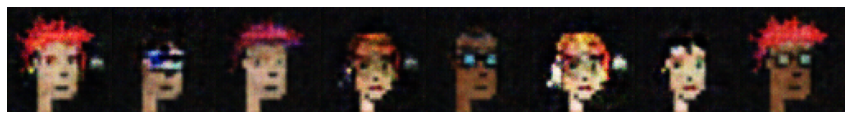

Epoch [   11/   50] | d_loss: 0.4833 | g_loss: 3.8429
Epoch [   12/   50] | d_loss: 0.3864 | g_loss: 3.4479
Epoch [   13/   50] | d_loss: 0.6876 | g_loss: 0.9929
Epoch [   14/   50] | d_loss: 0.5559 | g_loss: 1.9414
Epoch [   15/   50] | d_loss: 0.3450 | g_loss: 3.4091
Epoch [   16/   50] | d_loss: 0.3416 | g_loss: 5.4781
Epoch [   17/   50] | d_loss: 0.4470 | g_loss: 6.3451
Epoch [   18/   50] | d_loss: 0.3773 | g_loss: 4.4023
Epoch [   19/   50] | d_loss: 0.4489 | g_loss: 2.3535
Epoch [   20/   50] | d_loss: 0.3581 | g_loss: 5.3420


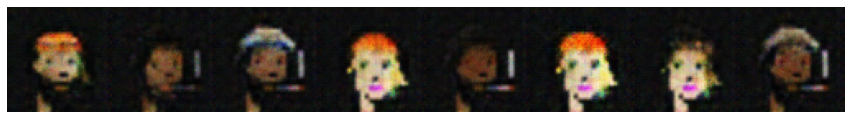

Epoch [   21/   50] | d_loss: 0.3577 | g_loss: 6.0596
Epoch [   22/   50] | d_loss: 0.3699 | g_loss: 5.3366
Epoch [   23/   50] | d_loss: 1.5364 | g_loss: 0.7441
Epoch [   24/   50] | d_loss: 1.4301 | g_loss: 0.4829
Epoch [   25/   50] | d_loss: 1.5397 | g_loss: 0.4340
Epoch [   26/   50] | d_loss: 0.4118 | g_loss: 2.8355
Epoch [   27/   50] | d_loss: 0.4068 | g_loss: 3.2676
Epoch [   28/   50] | d_loss: 0.4472 | g_loss: 1.7345
Epoch [   29/   50] | d_loss: 0.3967 | g_loss: 3.8012
Epoch [   30/   50] | d_loss: 0.3688 | g_loss: 4.0533


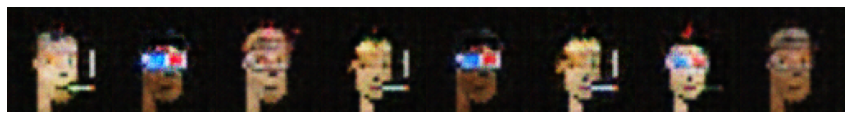

Epoch [   31/   50] | d_loss: 0.6067 | g_loss: 1.6154
Epoch [   32/   50] | d_loss: 0.6159 | g_loss: 1.4255
Epoch [   33/   50] | d_loss: 0.4113 | g_loss: 3.1462
Epoch [   34/   50] | d_loss: 0.3344 | g_loss: 5.1891
Epoch [   35/   50] | d_loss: 0.8935 | g_loss: 0.7354
Epoch [   36/   50] | d_loss: 0.3852 | g_loss: 4.5633
Epoch [   37/   50] | d_loss: 0.6512 | g_loss: 1.8324
Epoch [   38/   50] | d_loss: 0.3397 | g_loss: 5.6238
Epoch [   39/   50] | d_loss: 0.4466 | g_loss: 3.8352
Epoch [   40/   50] | d_loss: 0.3428 | g_loss: 2.9240


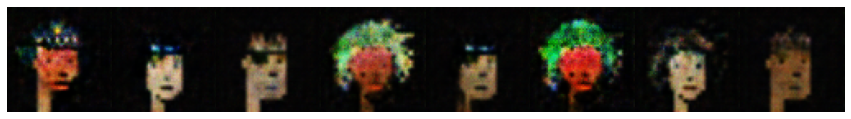

Epoch [   41/   50] | d_loss: 0.3835 | g_loss: 4.7520
Epoch [   42/   50] | d_loss: 1.1456 | g_loss: 0.5677
Epoch [   43/   50] | d_loss: 0.4095 | g_loss: 4.1851
Epoch [   44/   50] | d_loss: 0.3696 | g_loss: 2.8501
Epoch [   45/   50] | d_loss: 0.3433 | g_loss: 5.0337
Epoch [   46/   50] | d_loss: 1.5838 | g_loss: 2.5449
Epoch [   47/   50] | d_loss: 0.3618 | g_loss: 4.6298
Epoch [   48/   50] | d_loss: 0.6028 | g_loss: 1.1717
Epoch [   49/   50] | d_loss: 0.5725 | g_loss: 2.8406
Epoch [   50/   50] | d_loss: 0.5070 | g_loss: 3.5597


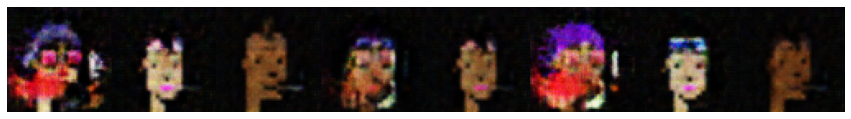

In [ ]:
#start training
%time
n_epochs = 50
train(discriminator,
      generator,
      n_epochs,
      dataloader,
      d_optimizer,
      g_optimizer,
      z_dim,
      print_every=10,
      device=device)

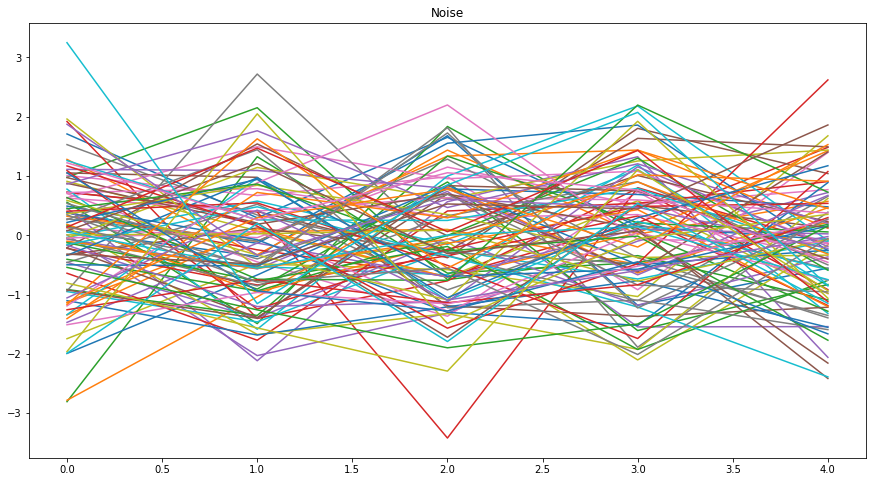

In [ ]:
plt.figure(figsize = (15, 8))
plt.plot(noise)
plt.title("Noise")
plt.show()

In [ ]:
def save_model(generator,file_name):
    generator = generator.to('cuda')
    torch.save(generator.state_dict(),"cryptopunks_generator.pth")

save_model(generator,"kaggle")

# Create New CryptoPunks

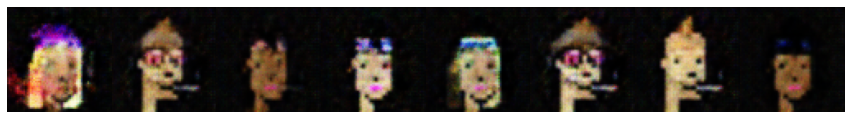

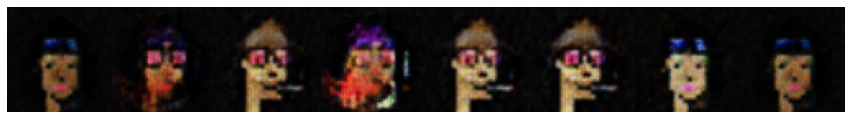

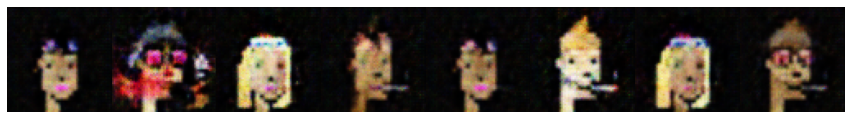

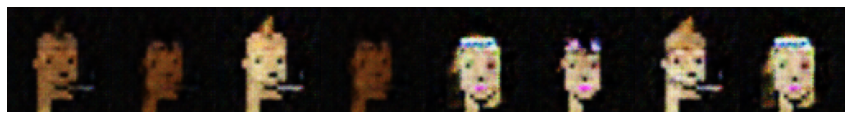

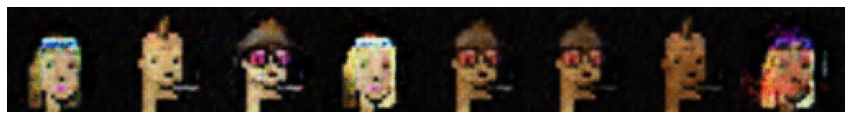

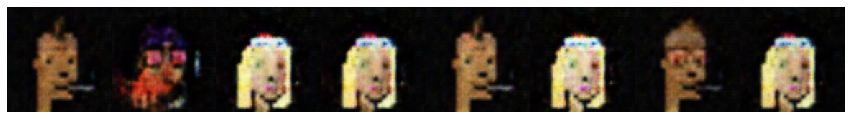

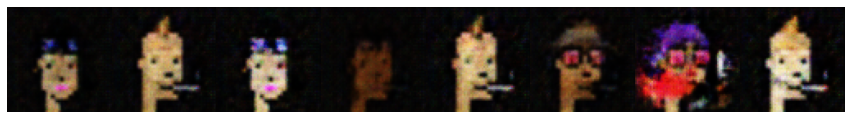

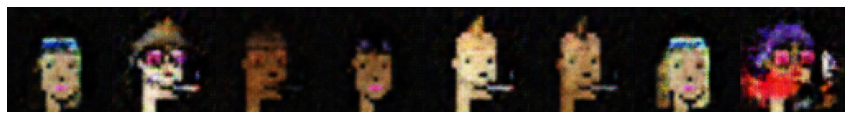

In [ ]:
#sample generation
generator.to(device)
generator.eval()       #eval mode
sample_size=8

for i in range(8):    
    
    #generate latent vectors
    fixed_z = Generator.get_noise(n_samples=sample_size, 
                                  z_dim=z_dim, 
                                  device=device)    
    
    #generate samples
    sample_image = generator(fixed_z)
    
    #display samples
    print_tensor_images(sample_image)